In [2]:
#hide
from utils import *
hc(
    "Probability - A Basic Overview",
    []
)

## PREVIEW

<img src="../data/images/probability.png" width="200" style="border-radius: 15px;">

The text to explain probability

## Source

[Chapter 2: Probability](https://sar.ac.id/stmik_ebook/prog_file_file/XCN2xPxjGa.pdf)

## Motivation

*Probabilty theory* lays out the foundation for numerous applications that we use in on a daily basis. This is my attempt to explore the theory in a reasonable depth so that I can appreciate the beaty of how people used it to build so many products that today impact the whole of humanity.

## AIM

1. To read through chapter 2 and demonstrate my interpretation of the same with code wherever possible.

## Sample Space

A collection/set of all possible outcomes of an experiment. It is denoted by $\Omega$.

Example: If the experiment is tossing a dice then the sample space will be the set $\{1, 2, 3, 4, 5, 6\}$

## Event

Any subset of a *sample space* is an event. It is denoted by $E$.

Example: For an experiment of throwing a dice, we can have the following events:
- An event of getting 1: $\{1\}$
- An event of getting 5: $\{5\}$
- An event of getting even: $\{2, 4, 6\}$
- An event of getting 1, 6: $\{1, 6\}$
and so on...

For a sample space containing $N$ elements, the number of possible events is $2^N$.

Let's list out all the possible events for rolling a coin experiment.
$\{\phi, \{H\}, \{T\}, \{H, T\}\}$ 

**Exercise**: Write a python function get_all_possible_events that takes sample_space (set) and returns a set with all possible events.

In [155]:
#----------------------
# Naive Implementation.
#----------------------
from itertools import combinations
def get_all_possible_events(sample_space):
    """
    Given a sample space, find all the
    possible events.

    Parameters
    ----------
    sample_space: set[str, ...]
        - Set of outcomes.
    
    Returns
    -------
    set:
        Set of all possible events.
    """
    empty_event = frozenset(["PHI"])
    Es = set([empty_event]) # A set that will be filled with all the possible events
    N = len(sample_space) # Total number of possible outcomes
    sample_space = list(sample_space) # Because we will need indexing operation

    for i in range(1, N+1): # To keep track of how many outcomes we are putting together in the event
        for E in combinations(sample_space, i):
            Es.add(frozenset(E))

    # Check if the number of events is correct
    if len(Es) != 2 ** N:
        raise ValueError(f"The number of events is not correct")

    return Es

#--------------------------------------
# For people who want an implementation
# without using `combination` API
#--------------------------------------
def get_all_possible_events_bitwise(sample_space):
    """
    Given a sample space, find all the
    possible events using bitwise operations.

    Parameters
    ----------
    sample_space: set[str, ...]
        - Set of outcomes.
    
    Returns
    -------
    set:
        Set of all possible events.
    """

    sample_space = list(sample_space)
    N = len(sample_space)
    
    empty_event = frozenset()
    Es = set([empty_event])

    # Since we are using bit-wise ops, we will create a bit mask
    for bitmask in range(1 << N): # 1 << n = 2 ** N
        E = [] # To store a possible event
        for i in range(N): # Think of the list element to take ordered position in binary (000 - [A, B, C])
            # Since the mask has all the position combination, we just need to figure out which indices are activated (1)
            if bitmask & (1 << i): # This will only be true for cases when atleast the i-th position of mask is 1
                E.append(sample_space[i])

        Es.add(frozenset(E))

    return Es

Es = get_all_possible_events_bitwise({"Head", "Tail"})
print(Es)

{frozenset(), frozenset({'Head', 'Tail'}), frozenset({'Tail'}), frozenset({'Head'})}


## Set Operations

As mentioned above, sample space is a *set* of outcomes, event is a subset of *sample space*. It is going to be helpful if we learn some basics of set. In this section we discuss about some operations that we can perform on a set.

A set is a collection of unique (no repetition) objects with no ordering. The objects are also known as elements of the set. If an element $a$ belongs to the set $S$ then we denote it as $a \in S$ (read as 'a' belongs to 'S').

We will discuss set opertation in context to events (which is nothing but a set) to build some intuition for the subject of our focus (Probability).

### Union

A **union** of events $A, B, C, ...$ is an event say $Z$ consiting of all the outcomes in all these events. So the probabality of $Z$ to occur is the probability that any of $A, B, C, ...$ occurs. Union corresponds to **OR** and is denoted by $\cup$. Mathematically, we write \
$Z = A \cup B \cup C \cup ...$

### Intersection

An **intesection** of events $A, B, C, ...$ is an event say $Z$ consisting of outcomes that are common in all these events. So the probability of $Z$ to occur is the probability that all of $A, B, C, ...$ occurs. Intersection corresponds to **AND** and is denoted by $\cap$. Mathematically we write \
$Z = A \cap B \cap C \cap ...$

### Complement

A **complement** of an event $A$ is an event say $Z$ that occurs when $A$ does not occur. So the probality of the complement to occur is $1$ minus the probability of $A$ to occur. Complement corresponds to **NOT** and is denoted by $\bar A$. Mathematically we write \
$Z = \bar A$

### Difference

A difference of events $A$ and $B$ is an event say $Z$ consisting of all the outcomes in $A$ but not in $B$. So the probablity of the difference of $A$ and $B$ is the probability that $A$ occurs but not $B$. Difference corresponds to **BUT NOT** and is denoted by $A - B$. Mathematically, we write \
$Z = A - B$

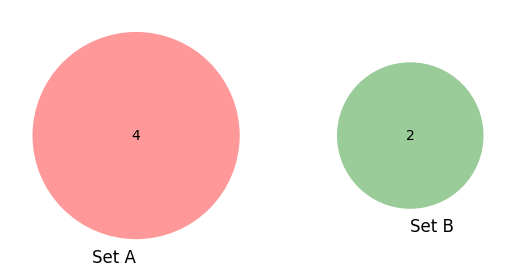

In [2]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

# Example with 2 sets
set1 = {1, 2, 3, 4}
set2 = {5, 6}

venn2([set1, set2], set_labels=('Set A', 'Set B'))
plt.show()


**Exercise**: Write a python class to demonstrate all the set operations, along with a method to visualise them as venn diagram.

In [162]:
import warnings

class Event:
    def __init__(self, outcomes=None, desc=None, sample_space=None):
        """
        Paramters
        ---------
        outcomes: list | None
            - List of all outcomes for the event.
        desc: str
            - Small description about the event.
        sample_space: list | None
            - List of all possible outcomes.

        Returns
        -------
        None
        """
        self._sample_space = None
        self._outcomes = None
        self._desc = desc

        if sample_space is not None:
            self._sample_space = set()
            for outcome in sample_space:
                self._sample_space.add(str(outcome))

        if outcomes is not None:
            self._sample_space = set()
            for outcome in outcomes:
                self.add(str(outcome))
    
    def add(self, outcome):
        """
        Add an outcome to the event.

        Parameters
        ----------
        outcome: str
            - The outcome to be added to the event.

        Returns
        -------
        None
        """
        outcome = str(outcome)
        self._outcomes.add(outcome)

    def remove(self, outcome):
        """
        Remove an outcome to the event.

        Parameters
        ----------
        outcome: str
            - The outcome to be removed from the event.

        Returns
        -------
        None
        """
        try:
            outcome = str(outcome)
            self._outcomes.remove(outcome)
        except KeyError as e:
            warnings.warn(f"The outcome {outcome} does not exist.")
            return
            
    def __len__(self):
        return len(self._outcomes)

    def __str__(self):
        return f"{self._outcomes}"

    def __repr__(self):
        return self.__str__()

    def union(self, other):
        outcomes = self._outcomes.union(other._outcomes)
        return self.__class__(outcomes, desc="$A \\cup B$")

    def intersection(self, other):
        outcomes = self._outcomes.intersection(other._outcomes)
        return self.__class__(outcomes, desc="$A \\cap B$")

    def difference(self, other):
        outcomes = self._outcomes.difference(other._outcomes)
        return self.__class__(outcomes, desc="$A - B$")

    def visualize(self, other=None, mode="plain", universe=None):
        """
        Visualize set operations using a Venn diagram.
    
        Parameters
        ----------
        other : Event | None
            - Another event (for union, intersection, difference).
        mode : str
            - One of {"plain", "union", "intersection", "difference", "complement"}
        universe : set | None
            - The sample space (only needed for complement).
        """
        from matplotlib_venn import venn2
        import matplotlib.pyplot as plt
    
        dark_blue = "#1f4e79"
        light_blue = "#a7c6ed"
    
        if other is None and mode != "complement":
            raise ValueError("Other event must be provided for this operation.")
    
        # Handle complement as a special case
        if mode == "complement":
            if universe is None:
                raise ValueError("Universe (sample space) required for complement.")
            comp = universe.difference(self._outcomes)
            other = Event(comp, desc=f"{self._desc}ᶜ")
    
        # Create the venn diagram
        v = venn2([self._outcomes, other._outcomes],
                  set_labels=(self._desc, other._desc))
    
        # Default: everything light blue with black outline
        for region in ("10", "01", "11"):
            p = v.get_patch_by_id(region)
            if p:
                p.set_facecolor(light_blue)
                p.set_edgecolor("black")
                p.set_alpha(0.8)
    
        # Highlight relevant regions
        if mode == "union":
            for region in ("10", "01", "11"):
                p = v.get_patch_by_id(region)
                if p:
                    p.set_facecolor(dark_blue)
    
        elif mode == "intersection":
            p = v.get_patch_by_id("11")
            if p:
                p.set_facecolor(dark_blue)
    
        elif mode == "difference":
            p = v.get_patch_by_id("10")  # A only
            if p:
                p.set_facecolor(dark_blue)
    
        elif mode == "complement":
            # Highlight the "other" circle (Aᶜ)
            p = v.get_patch_by_id("01")
            if p:
                p.set_facecolor(dark_blue)
    
        plt.show()

    


In [153]:
A = Event([2, 4, 6], desc="Even")
B = Event([1, 2, 3, 5], desc="Odd")

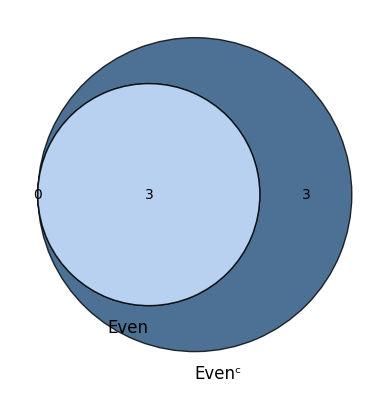

In [161]:
# A.visualize(B)
A.visualize(B, mode="complement", universe={1, 2, 3, 4, 5, 6})

AttributeError: 'list' object has no attribute 'values'

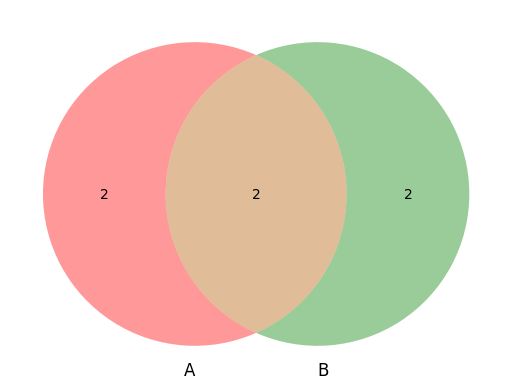

In [151]:
A = Event([1,2,3,4], desc="A")
B = Event([3,4,5,6], desc="B")
U = set(range(1,7))

A.visualize(B, mode="union")         # union
A.visualize(B, mode="intersection")  # intersection
A.visualize(B, mode="difference")    # difference (A - B)
A.visualize(mode="complement", universe=U)  # complement


In [129]:
A.union(B)

{'3', '4', '2', '1', '5', '6'}